# Final Project - Part 1

In [1]:
#import dependencies
import json
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# add import warnigns to skip any warning messages on the screen
import warnings
warnings.filterwarnings('ignore')

In [3]:
#create file direcotry
file_dir = 'C:/Users/larys/DAB/Final_Project/Resources/'

In [4]:
#import the csv files
shot_log = pd.read_csv(f'{file_dir}shot_logs.csv')
stats = pd.read_csv(f'{file_dir}players_stats.csv')

### Check first dataset - shot_logs

In [5]:
# check shot_log data
# check all column in the dataset
shot_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [6]:
# get an overview of the values each column contains
# .describe() only analyzes numeric columns by default
shot_log.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [7]:
# check all non-numeric columns
shot_log.describe(include=np.object)

,MATCHUP,LOCATION,W,GAME_CLOCK,SHOT_RESULT,CLOSEST_DEFENDER,player_name
count,128069,128069,128069,128069,128069,128069,128069
unique,1808,3,2,719,2,473,281
top,"FEB 07, 2015 - DAL vs. POR",A,W,0:01,missed,"Ibaka, Serge",james harden
freq,105,64134,64595,859,70164,814,1054


In [8]:
#check data for any strong correlation - correlation matrix
shot_log.corr()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
GAME_ID,1.000000,0.001726,0.008129,-0.008921,0.014530,0.002014,-0.000735,-0.000187,0.003418,0.028676,0.006739,-0.008761,-0.008464,0.027937
FINAL_MARGIN,0.001726,1.000000,0.000836,-0.003078,-0.009276,0.011739,0.010788,0.008876,0.024134,0.057165,0.033064,0.058762,0.064784,-0.050825
SHOT_NUMBER,0.008129,0.000836,1.000000,0.654932,-0.032683,0.141100,0.144071,0.011541,0.003054,0.013257,-0.037769,-0.008351,-0.009666,-0.006592
PERIOD,-0.008921,-0.003078,0.654932,1.000000,-0.051796,0.055301,0.046089,0.030080,0.048915,0.011462,-0.010204,-0.014082,-0.008501,0.004790
SHOT_CLOCK,0.014530,-0.009276,-0.032683,-0.051796,1.000000,-0.082771,-0.147688,-0.173026,-0.032809,-0.003289,0.026558,0.096855,0.084173,0.038315
DRIBBLES,0.002014,0.011739,0.141100,0.055301,-0.082771,1.000000,0.914311,-0.082540,-0.169016,0.016915,-0.153674,-0.034390,-0.055689,0.023655
TOUCH_TIME,-0.000735,0.010788,0.144071,0.046089,-0.147688,0.914311,1.000000,-0.085165,-0.181007,0.016225,-0.164737,-0.045299,-0.066736,0.001797
SHOT_DIST,-0.000187,0.008876,0.011541,0.030080,-0.173026,-0.082540,-0.085165,1.000000,0.740933,0.002777,0.523192,-0.191704,-0.069147,-0.024270
PTS_TYPE,0.003418,0.024134,0.003054,0.048915,-0.032809,-0.169016,-0.181007,0.740933,1.000000,0.006266,0.414198,-0.121293,0.030361,0.010486
CLOSEST_DEFENDER_PLAYER_ID,0.028676,0.057165,0.013257,0.011462,-0.003289,0.016915,0.016225,0.002777,0.006266,1.000000,-0.015057,-0.002633,-0.002046,-0.002317


In [9]:
# Clean version of correlation matrix (visualize)
corr = shot_log.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
GAME_ID,1.00,0.00,0.01,-0.01,0.01,0.00,-0.00,-0.00,0.00,0.03,0.01,-0.01,-0.01,0.03
FINAL_MARGIN,0.00,1.00,0.00,-0.00,-0.01,0.01,0.01,0.01,0.02,0.06,0.03,0.06,0.06,-0.05
SHOT_NUMBER,0.01,0.00,1.00,0.65,-0.03,0.14,0.14,0.01,0.00,0.01,-0.04,-0.01,-0.01,-0.01
PERIOD,-0.01,-0.00,0.65,1.00,-0.05,0.06,0.05,0.03,0.05,0.01,-0.01,-0.01,-0.01,0.00
SHOT_CLOCK,0.01,-0.01,-0.03,-0.05,1.00,-0.08,-0.15,-0.17,-0.03,-0.00,0.03,0.10,0.08,0.04
DRIBBLES,0.00,0.01,0.14,0.06,-0.08,1.00,0.91,-0.08,-0.17,0.02,-0.15,-0.03,-0.06,0.02
TOUCH_TIME,-0.00,0.01,0.14,0.05,-0.15,0.91,1.00,-0.09,-0.18,0.02,-0.16,-0.05,-0.07,0.00
SHOT_DIST,-0.00,0.01,0.01,0.03,-0.17,-0.08,-0.09,1.00,0.74,0.00,0.52,-0.19,-0.07,-0.02
PTS_TYPE,0.00,0.02,0.00,0.05,-0.03,-0.17,-0.18,0.74,1.00,0.01,0.41,-0.12,0.03,0.01
CLOSEST_DEFENDER_PLAYER_ID,0.03,0.06,0.01,0.01,-0.00,0.02,0.02,0.00,0.01,1.00,-0.02,-0.00,-0.00,-0.00


In [10]:
#try dirrerent style
# corr = shot_log.corr()
# cm = sns.light_palette("green", as_cmap=True)
# cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# corr.style.background_gradient(cmap=cm).set_precision(2)

In [11]:
# #create a correlation version of correlation matrix
# f = plt.figure(figsize=(19, 15))
# plt.matshow(shot_log.corr(), fignum=f.number)
# plt.xticks(range(shot_log.shape[1]), shot_log.columns, fontsize=14, rotation=90)
# plt.yticks(range(shot_log.shape[1]), shot_log.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# #plt.title('Correlation Matrix', fontsize=16);

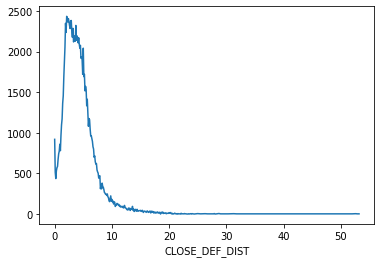

In [12]:
# check close defenedrs distance andhow it impacts points
%matplotlib inline
shot_log.groupby('CLOSE_DEF_DIST')['PTS'].sum().plot()

# the most seems to be within 1-5 ft

##### TBU - check more columns and visual representation between two-multiple columns

### Explore the second dataset - players_stats

In [13]:
# check stats file for data types
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

In [14]:
# get an overview of the values each column contains
# .describe() only analyzes numeric columns by default
stats.describe()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,422.000000,422.000000,422.000000,422.000000
mean,53.014286,1214.714286,502.108163,188.338776,419.526531,43.099184,39.387755,112.52449,25.519184,86.042857,...,24.075510,68.826531,101.483673,564.330612,1.465837,0.626000,27.507109,197.440758,99.469194,25.427747
std,24.175437,820.570132,422.084232,156.265752,337.367125,9.625231,47.880909,127.38575,15.796603,91.315316,...,31.662852,58.480701,65.326807,464.428031,0.825037,0.367443,4.220603,8.740250,12.364228,1.715794
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523
25%,33.000000,492.250000,145.250000,55.500000,139.000000,39.600000,1.000000,6.00000,15.500000,18.500000,...,5.000000,23.000000,45.500000,165.000000,0.920000,0.392500,24.000000,190.000000,90.000000,24.286136
50%,61.000000,1193.000000,423.000000,156.000000,357.500000,42.900000,18.000000,58.00000,31.300000,58.000000,...,14.000000,56.500000,103.000000,490.500000,1.345000,0.530000,27.000000,197.500000,99.000000,25.420833
75%,74.000000,1905.750000,774.000000,286.000000,642.750000,47.575000,66.000000,192.00000,36.400000,126.750000,...,29.750000,100.000000,148.750000,837.000000,1.920000,0.820000,30.000000,205.000000,108.000000,26.437500
max,83.000000,2981.000000,2217.000000,659.000000,1471.000000,100.000000,286.000000,646.00000,100.000000,715.000000,...,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141


In [15]:
# check all non-numeric columns
stats.describe(include=np.object)

,Name,Birth_Place,Birthdate,Collage,Experience,Pos,Team
count,490,422,422,350,422,422,422
unique,490,41,408,112,20,5,30
top,Otto Porter Jr.,us,20-Jul-91,Duke University,R,SG,NYK
freq,1,330,2,18,68,100,16


In [16]:
#check data for any strong correlation - correlation matrix
stats.corr()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.872959,0.727973,0.739667,0.741407,0.369492,0.492036,0.510728,0.218361,0.575342,...,0.459709,0.693894,0.860430,0.757467,0.169564,0.012988,0.139838,0.068284,0.080360,0.065185
MIN,0.872959,1.000000,0.920196,0.924123,0.926747,0.304910,0.601725,0.618675,0.278590,0.775022,...,0.499512,0.858630,0.872932,0.923723,0.198229,-0.045213,0.087547,0.009521,0.033385,0.052763
PTS,0.727973,0.920196,1.000000,0.990487,0.988716,0.275514,0.615766,0.627413,0.290644,0.909402,...,0.445102,0.883540,0.753363,0.941961,0.166571,-0.102540,0.063428,-0.016891,0.030831,0.078018
FGM,0.739667,0.924123,0.990487,1.000000,0.986789,0.310255,0.548751,0.560697,0.254783,0.868013,...,0.488795,0.872757,0.775502,0.951369,0.147698,-0.111683,0.065786,0.026565,0.077724,0.105658
FGA,0.741407,0.926747,0.988716,0.986789,1.000000,0.231871,0.624375,0.646638,0.309729,0.865389,...,0.406254,0.886276,0.757420,0.915277,0.195855,-0.100390,0.061307,-0.047915,0.002796,0.067171
FG%,0.369492,0.304910,0.275514,0.310255,0.231871,1.000000,-0.045385,-0.070072,-0.097218,0.235433,...,0.419133,0.226864,0.375768,0.383651,-0.124186,-0.064153,0.089074,0.366599,0.383616,0.216849
3PM,0.492036,0.601725,0.615766,0.548751,0.624375,-0.045385,1.000000,0.988563,0.537028,0.443760,...,-0.058761,0.495797,0.389995,0.453904,0.289378,0.065442,0.074057,-0.301668,-0.304422,-0.153515
3PA,0.510728,0.618675,0.627413,0.560697,0.646638,-0.070072,0.988563,1.000000,0.531573,0.462710,...,-0.065263,0.526029,0.407298,0.457740,0.308285,0.068205,0.060393,-0.324040,-0.326490,-0.164209
3P%,0.218361,0.278590,0.290644,0.254783,0.309729,-0.097218,0.537028,0.531573,1.000000,0.189836,...,-0.196782,0.221739,0.099524,0.160524,0.349797,0.101430,0.013422,-0.355749,-0.425045,-0.306359
FTM,0.575342,0.775022,0.909402,0.868013,0.865389,0.235433,0.443760,0.462710,0.189836,1.000000,...,0.415265,0.836937,0.623557,0.859884,0.112697,-0.126039,0.028665,-0.007247,0.040284,0.082334


In [17]:
# vusialize correlation matrix 
# plt.matshow(stats.corr())
# plt.show()

In [18]:
#create a bigger correlation version of correlation matrix
# f = plt.figure(figsize=(19, 15))
# plt.matshow(stats.corr(), fignum=f.number)
# plt.xticks(range(stats.shape[1]), stats.columns, fontsize=14, rotation=90)
# plt.yticks(range(stats.shape[1]), stats.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [19]:
#Check for any strong correlations within the dataset
players_corr = stats.corr()
players_corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.00,0.87,0.73,0.74,0.74,0.37,0.49,0.51,0.22,0.58,0.60,0.34,0.53,0.72,0.68,0.54,0.68,0.46,0.69,0.86,0.76,0.17,0.01,0.14,0.07,0.08,0.07
MIN,0.87,1.00,0.92,0.92,0.93,0.30,0.60,0.62,0.28,0.78,0.79,0.32,0.56,0.82,0.76,0.71,0.84,0.50,0.86,0.87,0.92,0.20,-0.05,0.09,0.01,0.03,0.05
PTS,0.73,0.92,1.00,0.99,0.99,0.28,0.62,0.63,0.29,0.91,0.90,0.34,0.48,0.76,0.70,0.73,0.81,0.45,0.88,0.75,0.94,0.17,-0.10,0.06,-0.02,0.03,0.08
FGM,0.74,0.92,0.99,1.00,0.99,0.31,0.55,0.56,0.25,0.87,0.87,0.32,0.54,0.79,0.74,0.70,0.79,0.49,0.87,0.78,0.95,0.15,-0.11,0.07,0.03,0.08,0.11
FGA,0.74,0.93,0.99,0.99,1.00,0.23,0.62,0.65,0.31,0.87,0.86,0.35,0.45,0.74,0.67,0.74,0.81,0.41,0.89,0.76,0.92,0.20,-0.10,0.06,-0.05,0.00,0.07
FG%,0.37,0.30,0.28,0.31,0.23,1.00,-0.05,-0.07,-0.10,0.24,0.29,0.22,0.47,0.42,0.45,0.08,0.18,0.42,0.23,0.38,0.38,-0.12,-0.06,0.09,0.37,0.38,0.22
3PM,0.49,0.60,0.62,0.55,0.62,-0.05,1.00,0.99,0.54,0.44,0.38,0.36,-0.12,0.23,0.12,0.53,0.59,-0.06,0.50,0.39,0.45,0.29,0.07,0.07,-0.30,-0.30,-0.15
3PA,0.51,0.62,0.63,0.56,0.65,-0.07,0.99,1.00,0.53,0.46,0.40,0.36,-0.12,0.23,0.13,0.56,0.61,-0.07,0.53,0.41,0.46,0.31,0.07,0.06,-0.32,-0.33,-0.16
3P%,0.22,0.28,0.29,0.25,0.31,-0.10,0.54,0.53,1.00,0.19,0.14,0.32,-0.23,0.02,-0.06,0.29,0.28,-0.20,0.22,0.10,0.16,0.35,0.10,0.01,-0.36,-0.43,-0.31
FTM,0.58,0.78,0.91,0.87,0.87,0.24,0.44,0.46,0.19,1.00,0.98,0.31,0.45,0.67,0.62,0.68,0.72,0.42,0.84,0.62,0.86,0.11,-0.13,0.03,-0.01,0.04,0.08


Text(0, 0.5, 'Count')

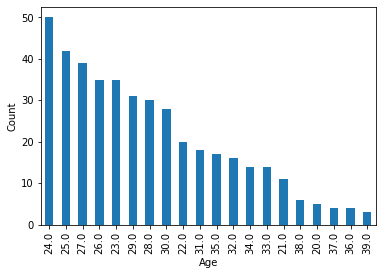

In [20]:
#explore/visualize age column
stats['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')

# most players are 24 years old

Text(0, 0.5, 'Count')

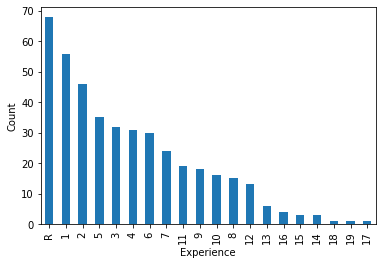

In [21]:
# check experience column
stats['Experience'].value_counts().plot(kind='bar')
plt.xlabel('Experience')
plt.ylabel('Count')

#rookies are in top and number of players decreases as their experience increases

Text(0, 0.5, 'Count')

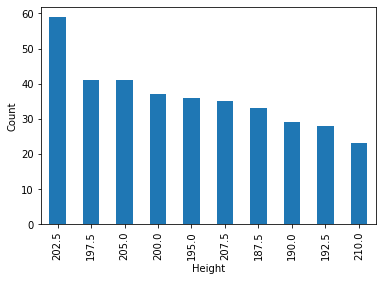

In [22]:
# check height column
stats['Height'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Height')
plt.ylabel('Count')